In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
#TRAIN_PATH = "../augmented_train/reformatted_train_106800_samples.csv"
TRAIN_PATH = "train_6000_samples_fft_0_to_10_hz_consensus_1.0_balanced.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[22682.639 299818.77014118433 64008.7723819212 ... -0.7923870447121509
  -0.0013196704708902 'Seizure']
 [1113.1626 38926.71999790333 13832.322232786384 ... 0.3986057207209534
  -1.218760501443648 'LPD']
 [4435.373 7428.639881923795 8293.709856327456 ... -1.4923959556223303
  -1.6929998413236245 'Seizure']
 ...
 [4008.2322 29667.5298884809 47632.20567392321 ... 1.1860176286817437
  1.5752811476406032 'LRDA']
 [929.7915 24839.510033786297 9492.30294925638 ... -2.8946984376154585
  2.4018440214373915 'GRDA']
 [3473.2268 8135.820021048188 24396.330241551455 ... -0.7471594693717639
  -0.5802349430320223 'GPD']]
(5962, 2421)


In [3]:
num_input = data_np.shape[1] - 1

x = data_np[:, 0:num_input]
y = data_np[:, num_input]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [4]:
num_neighbors = [5, 10, 15]

model = KNeighborsClassifier(n_neighbors = 1, weights='distance', p=1)

model.fit(x_train, y_train)

predictions_train = model.predict(x_train)
score_train = model.score(x_train, y_train)

predictions_val = model.predict(x_val)
score_val = model.score(x_val, y_val)

print('Training accuracy: {:0.5f}%  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

best_model = model

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

Training accuracy: 100.00000%  Validation accuracy: 74.83%
The test results.... 74.37%


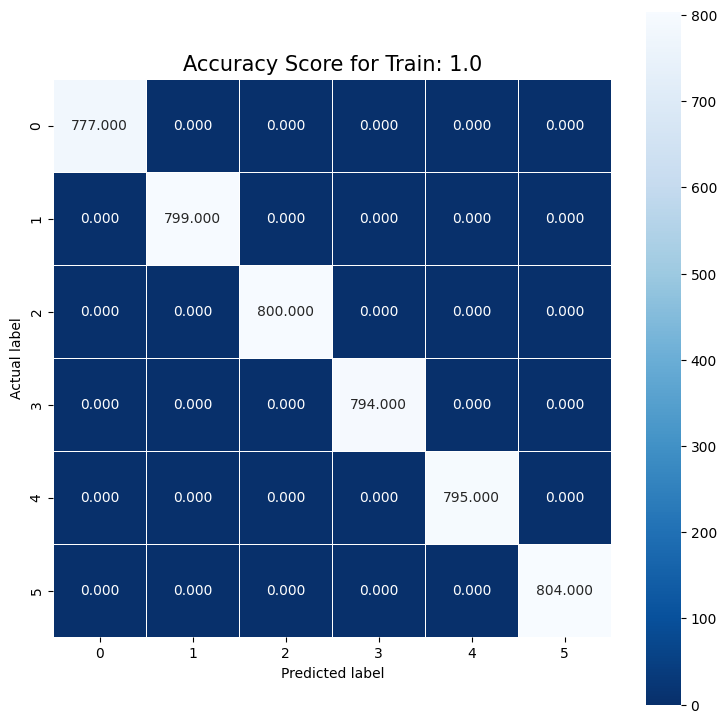

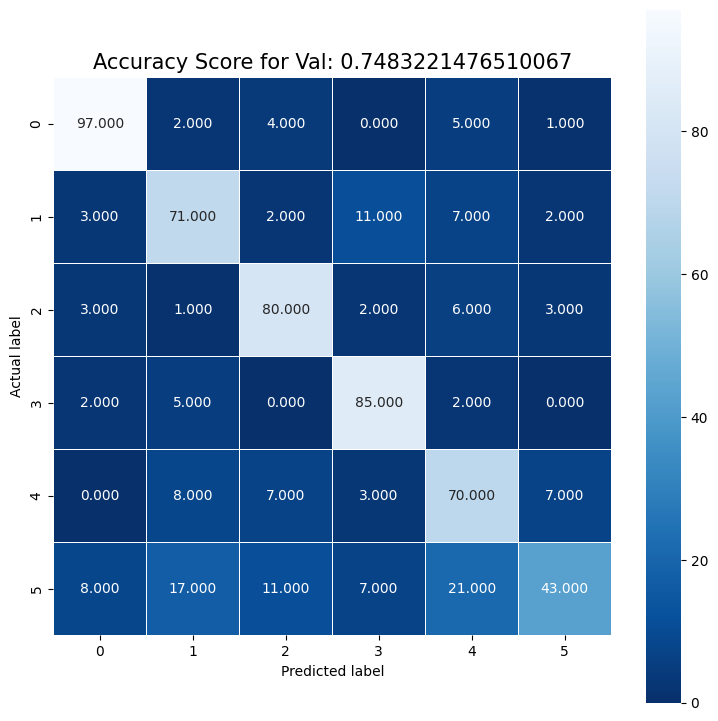

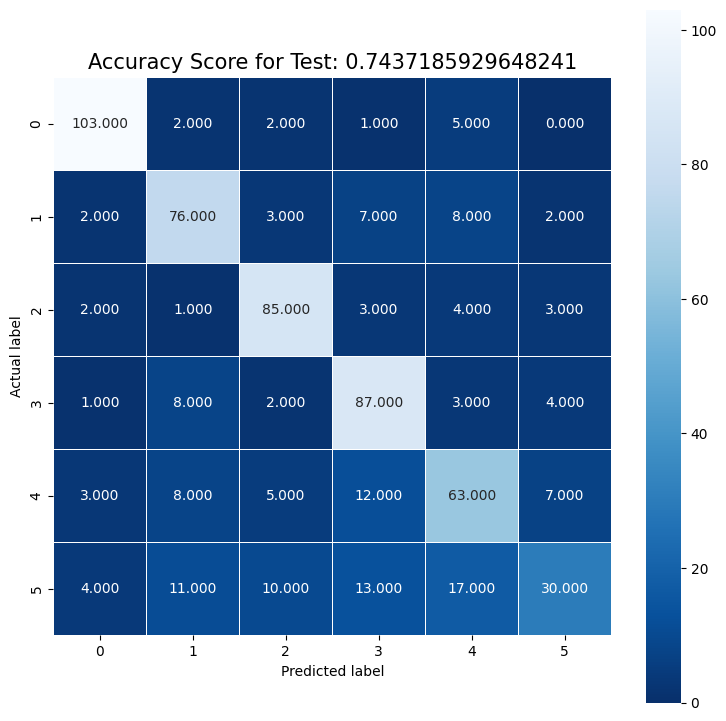

In [5]:
def confusion(predictions, actual, score, set):
    cm = skmetrics.confusion_matrix(actual, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = f'Accuracy Score for {set}: {score}'
    plt.title(all_sample_title, size = 15)

confusion(best_model.predict(x_train), y_train, best_model.score(x_train, y_train), "Train")
confusion(best_model.predict(x_val), y_val, best_model.score(x_val, y_val), "Val")
confusion(best_model.predict(x_test), y_test, best_model.score(x_test, y_test), "Test")